In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


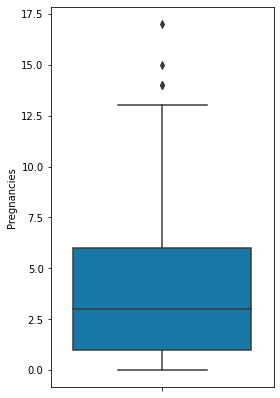

In [11]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="Pregnancies", data=df, palette="winter")

plt.show()

In [12]:
df = df[df.Pregnancies < 13]  # Ausreißer weg

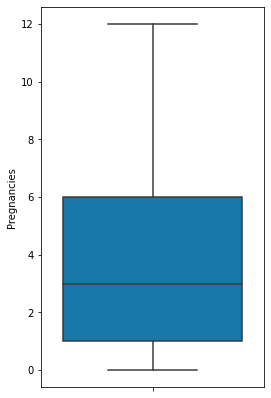

In [13]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="Pregnancies", data=df, palette="winter")

plt.show()

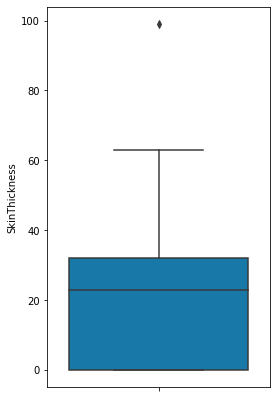

In [14]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="SkinThickness", data=df, palette="winter")

plt.show()

In [15]:
df = df[df.SkinThickness < 80]  # Ausreißer weg

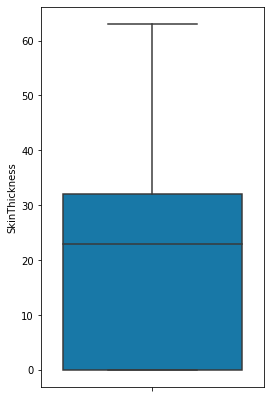

In [16]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="SkinThickness", data=df, palette="winter")

plt.show()

In [18]:
df.shape

(753, 9)

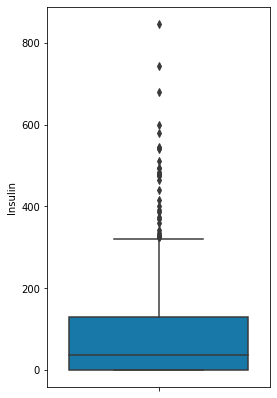

In [19]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="Insulin", data=df, palette="winter")

plt.show()

<AxesSubplot:>

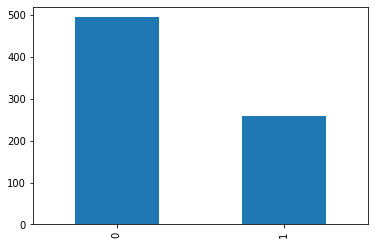

In [20]:
df.Outcome.value_counts().plot.bar()

<AxesSubplot:>

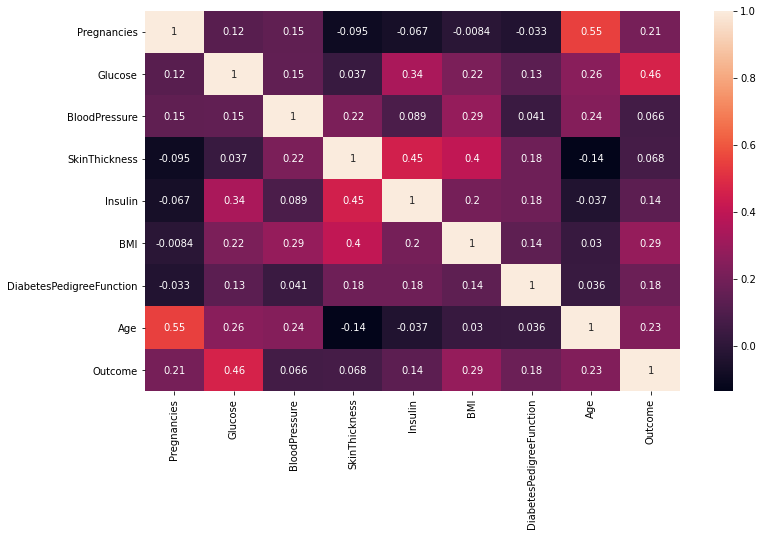

In [21]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True)

In [22]:
df.corr()["Outcome"].sort_values()

BloodPressure               0.065731
SkinThickness               0.068466
Insulin                     0.137418
DiabetesPedigreeFunction    0.176336
Pregnancies                 0.207047
Age                         0.232696
BMI                         0.288900
Glucose                     0.464893
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

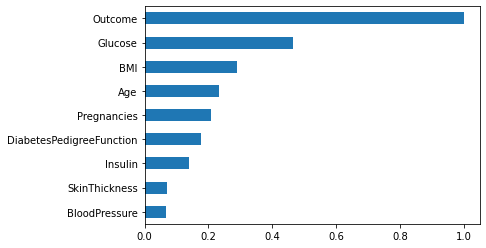

In [23]:
df.corr()["Outcome"].sort_values().plot.barh()

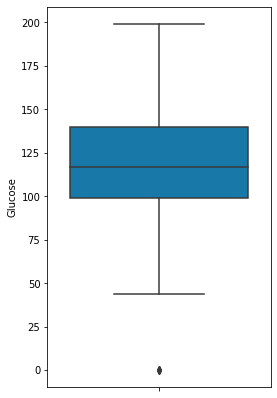

In [24]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="Glucose", data=df, palette="winter")

plt.show()

In [25]:
df = df[df.Glucose > 0]

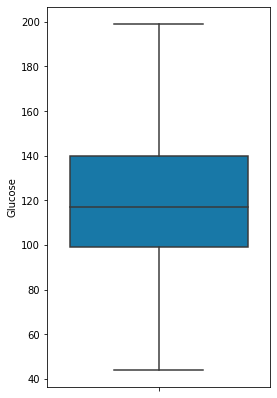

In [26]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="Glucose", data=df, palette="winter")

plt.show()

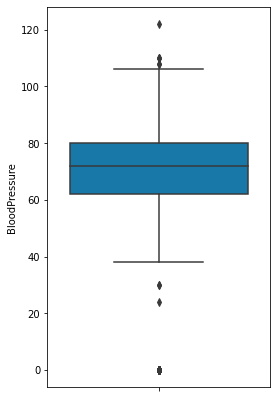

In [27]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="BloodPressure", data=df, palette="winter")

plt.show()

In [30]:
df = df[df.BloodPressure > 40]

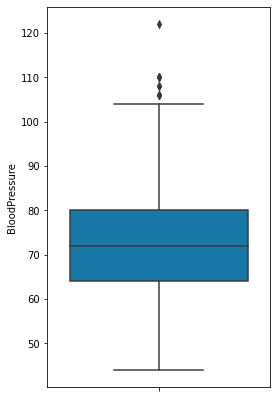

In [31]:
plt.figure(figsize=(4, 7))
sns.boxplot(y="BloodPressure", data=df, palette="winter")

plt.show()

<AxesSubplot:>

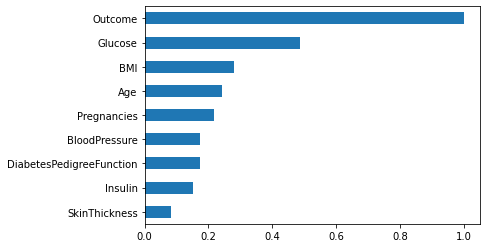

In [32]:
df.corr()["Outcome"].sort_values().plot.barh()

In [33]:
df.shape

(709, 9)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [36]:
X.shape

(709, 8)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
X_train.shape

(531, 8)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
model.score(X_test, y_test)

0.797752808988764

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.8029411764705883


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
print(confusion_matrix(y_test, y_pred))

[[106  21]
 [ 15  36]]


**106 TN(healthy true predict), 36 TP(diabetes true predict), 15(FN)+36(TP) = Diabetes, 106(TN)+21(FP)= Healthy,**
**1 is Positive**

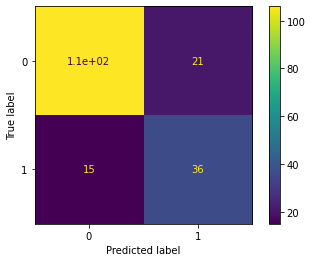

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

**36 - 15 Recall**

**36 - 21 Precision**

In [47]:
print(classification_report(y_test, y_pred))  # two values can be change according to approach. Positivs are immer 1. We must look at the 1

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       127
           1       0.63      0.71      0.67        51

    accuracy                           0.80       178
   macro avg       0.75      0.77      0.76       178
weighted avg       0.81      0.80      0.80       178



**Modelimizin evaluation degerlerinden yuksek olanina odaklanmaya gerek yok. Durust ve realitenin yaninda kalmak gerekir. Hersey yapildi, ama yine de model kalitesi belli bir esik degerini asamiyorsa, o zaman ilave veri seti talep etmeli ve belki de en önemlisi sample tipine ve kalitesine odaklanmakta fayda olabilir**

**En önemli degerler recall ve precisiondir. Bu ikisi baglaminda f1 önem arzeder. Accuracy cok guvenilir degildir. Accuracy nin cok yüksek, recall in cok düsük ciktigi modeller olabilir, zayif model anlamina gelir**